In [1]:
# model implementation
from ml.models.nn import MLP
from ml.algorithms.optimization import BackpropSGD
from ml.functions.activation import Sigmoid, Identity, Relu

# model selection
from ml.model_selection import GridSearchCV

from ml.functions.metrics.classification import F1Score, BinaryAccuracy
from ml.functions.metrics.regression import RMSE

from ml.stats import ClassificationStats

# data manipulation
from ml.dataset import load_csv, split_train_test
from ml.algorithms.normalization import MinMaxScaler

# Utility
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(25)

## Q1 - Neural Net for regression

### Load dataset

In [2]:
X, y = load_csv('./datasets/concrete.csv')
X_train, y_train, X_test, y_test = split_train_test(X, y, 0.6, shuffle=True)

In [3]:
x_scaler = MinMaxScaler()
x_scaler.fit(X_train)

y_scaler = MinMaxScaler()
y_scaler.fit(y_train)

X_train_scaled = x_scaler.transform(X_train)
y_train_scaled = y_scaler.transform(y_train)

In [13]:
_alpha=0.1
_lambda = 0.001

mlp = MLP(layers=(
                (8, Sigmoid()),
                (1, Identity())
            ),
            input_width = 8,
            solver = BackpropSGD(epochs=4000, learning_rate=_alpha, regularization=_lambda, batch_size=8, metrics=RMSE())
        )

In [14]:
err = mlp.fit(X_train_scaled, y_train_scaled)

Text(0.5, 0, 'Epoch')

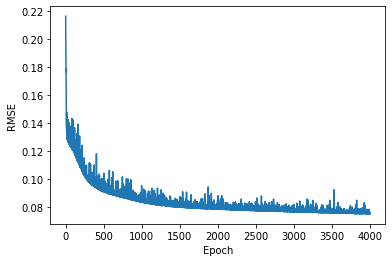

In [15]:
plt.plot(err)
plt.ylabel("RMSE")
plt.xlabel("Epoch")

### Find best hyperparameters using grid search

In [ ]:
grid = GridSearchCV(stats_generator=ClassificationStats)

_alpha=0.01
_lambda = 0.001
for num_neurons in [4, 8, 16]:
    grid.add(MLP, {
        "layers":(
            (num_neurons, Relu()),
            (1, Identity()), # 1-output regression
        ),
        "input_width": 8,
        "solver": BackpropSGD(epochs=4000, learning_rate=_alpha, regularization=_lambda, batch_size=8, metrics=RMSE()),
    })

best = grid.search(X_train, y_train, num_folds=10, shuffle=False)

KeyboardInterrupt: 